In [458]:
from sklearn.datasets import fetch_california_housing


In [459]:
boston = fetch_california_housing()
# More details about what load_boston() function returns are in this link https://scikit-learn.org/1.0/modules/generated/sklearn.datasets.load_boston.html

In [460]:
print(boston.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [461]:
#Find features and target
x = boston.data
y = boston.target

In [462]:
#find features name
columns = boston.feature_names
columns

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [463]:
#Description of dataset
print(boston.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [464]:
#  import pandas
import pandas as pd

In [465]:
# Create dataframe of the boston data
boston_df = pd.DataFrame(boston.data)
boston_df.columns=columns
boston_df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [466]:
boston_df.shape

(20640, 8)

In [467]:
# Create dataframe
y_df = pd.Series(y)
y_df.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
dtype: float64

In [468]:
# check the shape of the DataFrame (rows, columns)
boston_df.shape

(20640, 8)

In [469]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


=============== Data Prepartion ===============

In [470]:
## By first, when we want to build a blind model, we apply just necessary operations(preprocessing) on the data 
## because we need just establish the pipline, check that all work well, we talk about model version 00, 
## a baseline model,  
## When all goes well, in a loop we tray, depend on data that we have, and for what objective, we apply all  
## data preparation operations

Missing values, Outliers, duplicates, standarization, transformation, etc

Understanding by exploring and visualizing data

In [471]:
# conventional way to import seaborn
import seaborn as sns
# allow plots to appear within the notebook
%matplotlib inline
boston_df_ext = boston_df.copy()
boston_df_ext['MEDV']=y

C:\Users\lazra\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


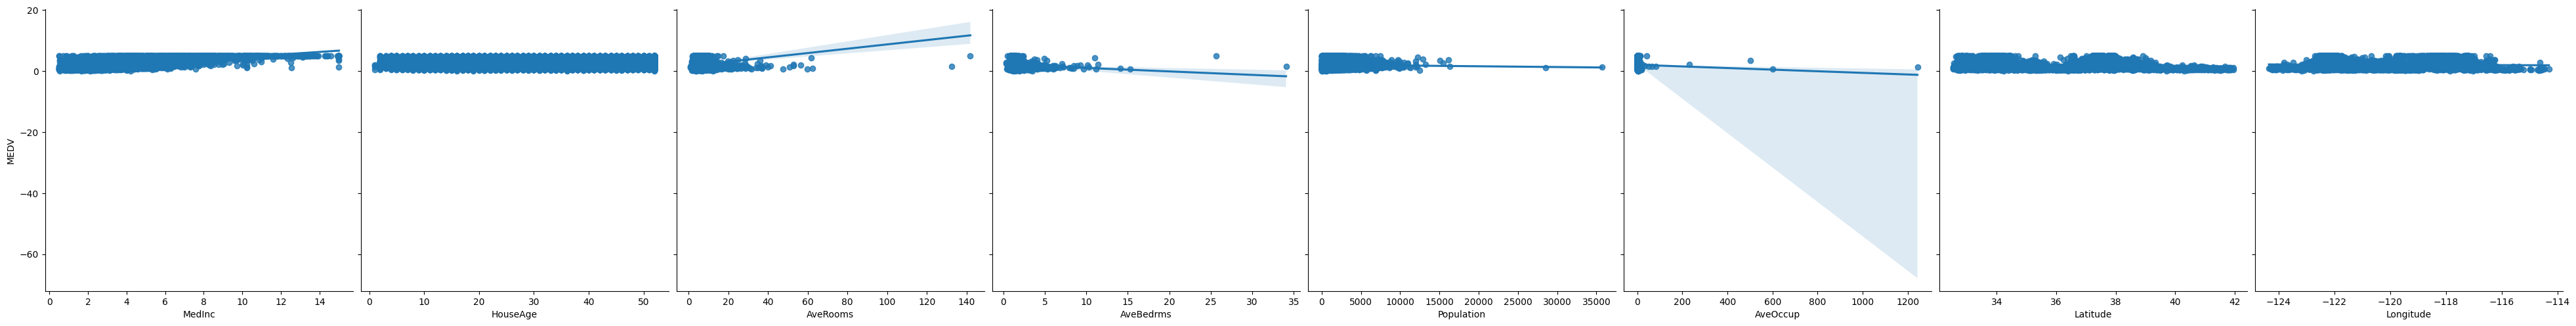

In [472]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(boston_df_ext, x_vars=columns, y_vars='MEDV', size=5,kind='reg')

we can see that the AveRooms, AveBedms, population and AVeOccup have the same plot +-, as well as the Latitude adn Longitude parameters, so i will study the correlation between these parameters after standarizing the values

In [473]:
#importing the standard scaling module
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#dropping the target variable
independent_columns = boston_df_ext.drop(columns=['MEDV'])

# Standardize the independent variables
scaled_data = scaler.fit_transform(independent_columns)

# Convert the scaled data back to a DataFrame to be able to plot it
scaled_df = pd.DataFrame(scaled_data, columns=independent_columns.columns)


<Axes: >

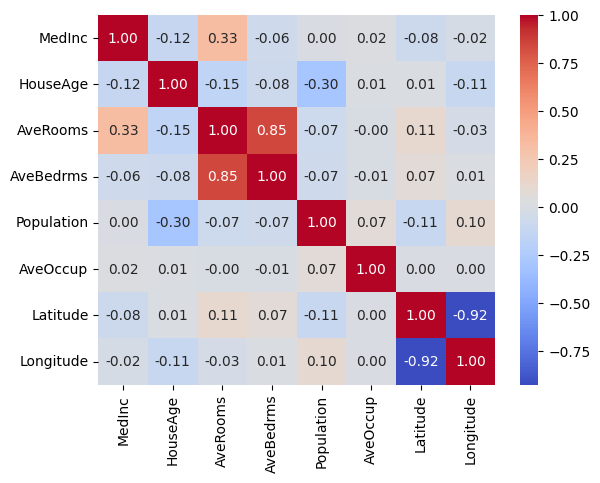

In [474]:
import seaborn as sns

# Plot the heatmap
correlation = scaled_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")


we have a correlation of -0.92 between Longitude and latitude and a correlation of 0.85 between aveBedrms and AveRooms. We'll try droping Longitude and AveBedrms form the df adn see if that will help optimize the model

In [475]:
boston_df = boston_df_ext.drop(columns=['MEDV'])
# boston_df = boston_df_ext.drop(columns=['AveBedrms'])
# columns = boston_df.columns

boston_df = boston_df_ext.drop(columns=['Longitude'])
columns = boston_df.columns


Start training

In [476]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston_df, y, test_size=0.2,random_state=1)

In [477]:
# default split is 80% for training and 20% for testing
#shuffle=True or false
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16512, 8)
(16512,)
(4128, 8)
(4128,)


In [478]:
# To train a model like LinearRegression
# import model
from sklearn.linear_model import LinearRegression
# instantiate
linreg = LinearRegression()
# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression()

In [479]:
#To train another model like LinearRegression
# import model
#from sklearn.linear_model import SGDRegressor
# instantiate
#SGDreg = SGDRegressor()
# fit the model to the training data (learn the coefficients)
#SGDreg.fit(X_train, y_train)

Model coefficients

In [480]:
# print the intercept and coefficients
print(linreg.intercept_)

8.260059303211165e-14


In [481]:
# pair the feature names with the coefficients
list(zip(columns, linreg.coef_))

[('MedInc', -3.1527738310446126e-15),
 ('HouseAge', -2.733924198139448e-15),
 ('AveRooms', 8.239936510889834e-16),
 ('AveBedrms', -1.1892071528907255e-15),
 ('Population', 0.0),
 ('AveOccup', -5.941427905220564e-17),
 ('Latitude', 8.174884380540703e-17),
 ('MEDV', 1.0000000000000009)]

Making predictions

In [482]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

Loss function : Evaluation metrics for regression
We need an evaluation metric in order to compare our predictions with the actual values!

Evaluation metrics for classification problems, such as accuracy, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

In [483]:
import numpy as np
from sklearn import metrics

In [484]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3.4269122168482314e-14


### This markdown cell will record the accuracy of thoughout the developement of the model (from blend model to the final stage):

1. blend model: 0.7274202599183915
2. After removing the AveBedrms feature: 9.737011449099373e-14
3. After removing the Longitude feature: 3.4269122168482314e-14

## Put the model into production
Use model to make some prediction, as you know we don't have new data, for that we will check with one row from data

In [485]:
boston_df.iloc[100:101].head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,MEDV
100,2.4912,29.0,3.7248,1.1312,2304.0,1.8432,37.81,2.578


In [486]:
# tray many example by changing the index of row
y_pred = linreg.predict(boston_df.iloc[100:101])
print('- The asset could got a price of :{} '.format(y_pred) )

- The asset could got a price of :[2.578] 


In [487]:
print('- The real price is :{} '.format(y[100]) )

- The real price is :2.578 
